Analysis of Crypto Currencies

The following report will explore the following questions:
1. How do crypto currency daily prices and percent changes compare to one another?
2. How does the daily volatility of various crypto currencies compare to one another?
3. How do crypto currency daily prices and percent changes compare to the stock market?
4. How do crypto currency daily prices and percent changes compare to the various industries in the global market?
5. How does the stock market compare to various industries in percent change?
6. Which days of the week account for the biggest price changes in crypto currencies?
7. Which days of the week see the most trade activity?
8. How do geo-political events effect crypto prices?
9. Do certain events have a greater impact on crypto prices?
10. How do crypto currency percent changes compare to one another on a minutly, hourly, and daily basis?
11. Can we learn more about the relationships through examening 1 day of minute data and the graphs that result?
12. How do changes in price in BTC directly compare to changes in price with other cryptos? - Different than the above
13. Do changes in crypto prices with BTC follow a pattern/reverting back to a moving average?
14. Are there certain times of the day that prices change more?

In [1]:
# Import appropriate modules
import pandas as pd
import numpy as np
from urllib import request
from io import StringIO as sio
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# Establish global variables (used for retrievale of price data)
API_KEY = 'YB4JQ1P8YKWH81O1'
BASE_URL = 'https://www.alphavantage.co/query?'
CRYPTO_URL = 'function=DIGITAL_CURRENCY_DAILY&market=USD&symbol={0}&apikey={1}&datatype=csv'
STOCK_URL = 'function=TIME_SERIES_DAILY_ADJUSTED&symbol={0}&outputsize=full&apikey={1}&datatype=csv'

In [3]:
# Retrieve Crypto Daily Data from Alpha Vantage
# All Crypto prices must be pulled indivdually but are merged into a single dataframe
# Note: If an error is returned, please try again or restart the kernal. I have found that a poor
# internet connection can make generating the data challenging

main_df = pd.DataFrame
# The below list can be added to. Current crypto tickers represent 
# the securities offered on Coinbase - the leading crypto exchange
crypto_list = ['btc', 'bch', 'eth', 'ltc']
def get_crypto_prices(ctkrs, api_key):
    global main_df
    for tkr in ctkrs:
        tkr = tkr.upper()
        url = (BASE_URL + CRYPTO_URL).format(tkr, api_key)
        response = request.urlopen(url)
        data = response.read()
        data = data.decode('utf-8')
        data = sio(data)
        data = pd.read_csv(data, 
                           usecols=['timestamp', 'high (USD)', 'low (USD)', 'close (USD)', 'volume'],
                          parse_dates=['timestamp'],
                          index_col='timestamp')
        data.columns = [tkr + '-high', tkr + '-low', tkr + '-close', tkr + '-volume' ]
        if main_df.empty:
            main_df = data
        else:
            main_df = pd.concat([main_df, data], axis=1)
    return main_df
main_df = get_crypto_prices(crypto_list, API_KEY)
main_df.head()

,BTC-high,BTC-low,BTC-close,BTC-volume,BCH-high,BCH-low,BCH-close,BCH-volume,ETH-high,ETH-low,ETH-close,ETH-volume,LTC-high,LTC-low,LTC-close,LTC-volume
timestamp,,,,,,,,,,,,,,,,
2014-04-01,491.267273,468.480106,479.023434,62894.683068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.645495,13.150012,13.231137,367733.038808
2014-04-02,494.111337,430.725909,438.377824,96314.587552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.440533,10.966630,11.313907,893306.091117
2014-04-03,452.441405,414.811104,446.819755,74292.749549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.331873,10.261536,11.110053,658963.208751
2014-04-04,457.327172,429.184117,451.645992,39267.667348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.447770,10.739046,11.094526,335313.120003
2014-04-05,466.385470,445.107783,464.379322,21574.144537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.306556,10.830378,11.251796,151144.939890


In [82]:
# Retrieve Stock ETF Daily Data from Alpha Vantage and merge with main df
# All prices must be pulled indivdually but are merged into a single dataframe, 
# which also contains the above crypto price data
stock_dict = {'.inx': 'S&P 500', '.dji': 'DJIA', 'ixic': 'NASDAQ', 
              'xle': 'ENERGY', 'xlf': 'FINANCIAL', 'xrt': 'RETAIL', 'xlk': 'TECH'}
def get_stock_prices(stock_list, api_key):
    global BASE_URL
    global STOCK_URL
    global main_df
    for tkr, value in stock_list.items():
        tkr = tkr.upper()
        url = (BASE_URL + STOCK_URL).format(tkr, api_key)
        response = request.urlopen(url)
        data = response.read()
        data = data.decode('utf-8')
        data = sio(data)
        data = pd.read_csv(data, 
                           usecols=['timestamp', 'adjusted_close'],
                          parse_dates=['timestamp'],
                          index_col='timestamp')
        data.columns = [value + '-close']
        main_df = pd.concat([main_df, data], axis=1)
    return main_df
main_df = get_stock_prices(stock_dict, API_KEY)
main_df.head()

,BTC-high,BTC-low,BTC-close,BTC-volume,BCH-high,BCH-low,BCH-close,BCH-volume,ETH-high,ETH-low,...,LTC-low,LTC-close,LTC-volume,S&P 500-close,DJIA-close,NASDAQ-close,ENERGY-close,FINANCIAL-close,RETAIL-close,TECH-close
timestamp,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1455.22,11357.5098,4131.1499,18.8577,12.8987,NaN,44.3792
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1399.42,10997.9297,3901.6899,18.5027,12.3350,NaN,42.1298
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1402.11,11122.6504,3877.5400,18.7725,12.3406,NaN,42.1538
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1403.45,11253.2598,3727.1299,19.7239,12.7747,NaN,40.1286
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1441.47,11522.5596,3882.6201,19.9369,12.9833,NaN,40.8250


In [88]:
main_df.to_csv('data-sets/final_project_data.csv')

In [83]:
# Clean up column headers and specify which dates to look at
# Analysis will be from 01-01-2015 to 05-01-2018
# These dates were chosen for the following reasons:
#    Crypto currencies saw little movement up until the last couple of years
#    End of 2017 and beginning of 2018 have seen drastic changes in crypto prices

main_df.columns = main_df.columns.str.replace('-', '_').str.replace(' ', '_').str.upper()
main_df = main_df.loc['2015-01-01':'2018-05-01']
main_df.head()

,BTC_HIGH,BTC_LOW,BTC_CLOSE,BTC_VOLUME,BCH_HIGH,BCH_LOW,BCH_CLOSE,BCH_VOLUME,ETH_HIGH,ETH_LOW,...,LTC_LOW,LTC_CLOSE,LTC_VOLUME,S&P_500_CLOSE,DJIA_CLOSE,NASDAQ_CLOSE,ENERGY_CLOSE,FINANCIAL_CLOSE,RETAIL_CLOSE,TECH_CLOSE
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-01-01,321.090926,314.907615,315.168729,24577.540390,NaN,NaN,NaN,NaN,NaN,NaN,...,2.691603,2.696141,2.350337e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,316.629880,314.309142,316.527123,24157.993310,NaN,NaN,NaN,NaN,NaN,NaN,...,2.653422,2.663667,2.128198e+05,2058.20,17832.9902,4726.8101,72.3607,18.9466,45.5926,39.0608
2015-01-03,316.984061,282.505860,282.505860,111697.515729,NaN,NaN,NaN,NaN,NaN,NaN,...,2.122019,2.122019,1.412156e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,287.245163,257.833938,264.171237,203600.565013,NaN,NaN,NaN,NaN,NaN,NaN,...,1.900304,1.953485,1.505971e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,278.144968,265.179998,274.171584,116597.064076,NaN,NaN,NaN,NaN,NaN,NaN,...,1.957432,2.084853,4.772878e+06,2020.58,17501.6504,4652.5698,69.3673,18.5482,45.0761,38.4645


Coinbase Prices as of 05-01-2018:
BTC: $9,104.42
BCH: $1,355.81
ETH: $673.03
LTC: $148.55



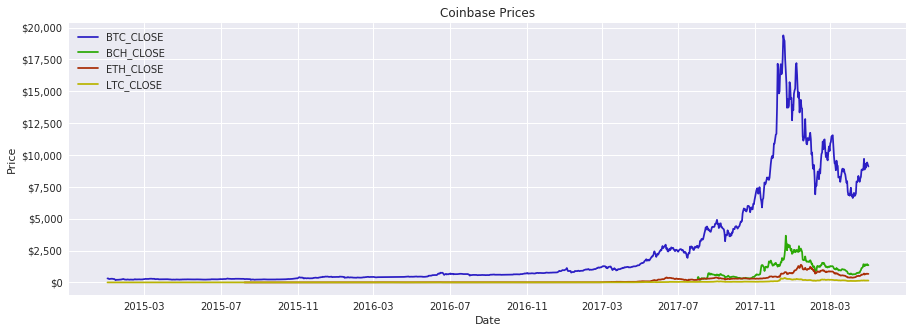

In [84]:
# Question 1.1:
# Compare prices of the crypto currencies offered on Coinbase

figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

axes.plot(main_df['BTC_CLOSE'], color='#2C1FC4')
axes.plot(main_df['BCH_CLOSE'], color='#2CA907')
axes.plot(main_df['ETH_CLOSE'], color='#A92E07')
axes.plot(main_df['LTC_CLOSE'], color='#BAB504')
axes.set_title('Coinbase Prices')
axes.set_xlabel('Date')
axes.set_ylabel('Price')
vals = axes.get_yticks()
axes.set_yticklabels(['${:,.0f}'.format(x) for x in vals])
axes.legend(['BTC_CLOSE', 'BCH_CLOSE', 'ETH_CLOSE', 'LTC_CLOSE'], loc='upper left')

print('Coinbase Prices as of 05-01-2018:\n'
      'BTC: ${0:,.2f}\nBCH: ${1:,.2f}\nETH: ${2:,.2f}\nLTC: ${3:,.2f}\n'.format(main_df['BTC_CLOSE'][-1],
                                                            main_df['BCH_CLOSE'][-1],
                                                            main_df['ETH_CLOSE'][-1],
                                                            main_df['LTC_CLOSE'][-1]))

From the graph above, we can see the difference in prices for crypto currencies over the past ~3.5 years. Bitcoin is the clear leader on price alone, but does this hold true for growth rates?

In [85]:
# Question 1.2:
# Compare percent changes in prices of the crypto currencies offered on Coinbase
# Normalize crypto prices by using percent change from specific date
# Note: BCH was removed from calculation due to minimal amount of datapoints (No price data until August 2017)
crypto_list = ['btc', 'eth', 'ltc']
pct_change = pd.DataFrame
year_adjusted_df = main_df.loc['2015-10-01':'2018-05-01'] #ETH did not go live until roughly October 2015
for tkr in crypto_list:
    tkr = tkr.upper()
    close = tkr + '_CLOSE'
    data = (year_adjusted_df[close]-year_adjusted_df[close][0]) / year_adjusted_df[close][0] * 100.0
    if pct_change.empty:
        pct_change = data
    else:
        pct_change = pd.concat([pct_change, data], axis=1) 
pct_change.tail()

,BTC_CLOSE,ETH_CLOSE,LTC_CLOSE
timestamp,,,
2018-04-27,3676.083151,97435.373182,4797.232477
2018-04-28,3815.637425,102104.890862,4968.956629
2018-04-29,3847.006342,103066.624797,5022.289912
2018-04-30,3774.900720,100033.276334,4853.166273
2018-05-01,3716.830248,100656.768583,4859.612818


Total return since 10-01-2015:
BTC: 3,716.83%
ETH: 100,656.77%
LTC: 4,859.61%

Correlations in percent change from 10-01-2015:
BTC-LTC: 0.961
BTC-ETH: 0.92
ETH-LTC: 0.936


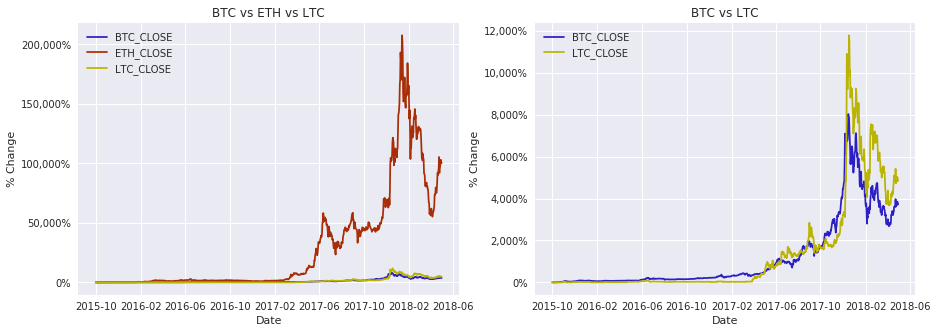

In [86]:
# Question 1.2 (continued):
# Compare percent changes in prices of the crypto currencies offered on Coinbase
figure, (left_axes, right_axes) = plt.subplots(1, 2)
figure.set_size_inches(15, 5)

left_axes.plot(pct_change['BTC_CLOSE'], color='#2C1FC4')
left_axes.plot(pct_change['ETH_CLOSE'], color='#A92E07')
left_axes.plot(pct_change['LTC_CLOSE'], color='#BAB504')
left_axes.set_title('BTC vs ETH vs LTC')
left_axes.set_ylabel('% Change')
vals = left_axes.get_yticks()
left_axes.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
left_axes.set_xlabel('Date')
left_axes.legend(pct_change, loc='upper left')

right_axes.plot(pct_change['BTC_CLOSE'], color='#2C1FC4')
right_axes.plot(pct_change['LTC_CLOSE'], color='#BAB504')
right_axes.set_title('BTC vs LTC')
right_axes.set_xlabel('Date')
right_axes.set_ylabel('% Change')

vals = right_axes.get_yticks()
right_axes.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

right_axes.legend(['BTC_CLOSE', 'LTC_CLOSE'], loc='upper left')

btc_ltc = pct_change['BTC_CLOSE'].corr(pct_change['LTC_CLOSE']).round(3)
btc_eth = pct_change['BTC_CLOSE'].corr(pct_change['ETH_CLOSE']).round(3)
eth_ltc = pct_change['ETH_CLOSE'].corr(pct_change['LTC_CLOSE']).round(3)
print('Total return since 10-01-2015:\n'
      'BTC: {0:,.2f}%\n'
      'ETH: {1:,.2f}%\n'
      'LTC: {2:,.2f}%\n'.format(pct_change['BTC_CLOSE'][-1],
                       pct_change['ETH_CLOSE'][-1],
                       pct_change['LTC_CLOSE'][-1]))
print('Correlations in percent change from 10-01-2015:\n'
      'BTC-LTC: {0}\nBTC-ETH: {1}\nETH-LTC: {2}'.format(btc_ltc,btc_eth, eth_ltc))

From the above graphs we can see the absurd growth each crypto currency has experienced over the last ~2.5 years. Interestingly, these cryptos are all very correlated with one another, indicating that they all increase together and decrease together, though the rates at which they rise and fall can be quite different - just look at ETH! Additionally this shows that while Bitcoin has the highest price, ethereum has seen a larger growth rate over this time period. This could be do to the fact the ethereum was valued very low relative to bitcoin at the beginning of this time period

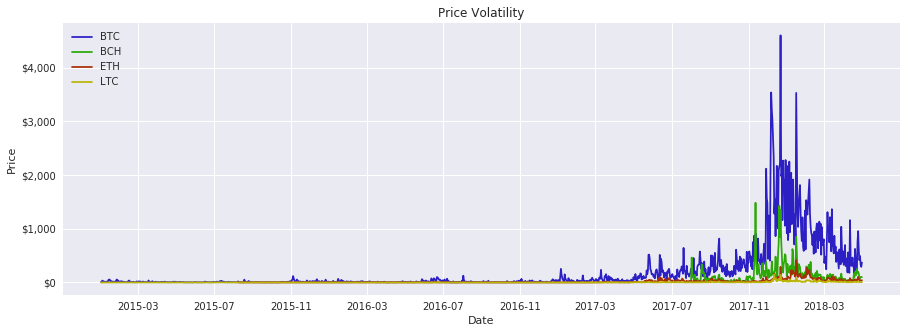

In [18]:
# Question 2.1:
# Compare the daily volatility of the crypto currencies offered on Coinbase
btc_volatility = (main_df['BTC_HIGH'] - main_df['BTC_LOW'])
bch_volatility = (main_df['BCH_HIGH'] - main_df['BCH_LOW'])
eth_volatility = (main_df['ETH_HIGH'] - main_df['ETH_LOW'])
ltc_volatility = (main_df['LTC_HIGH'] - main_df['LTC_LOW'])
volatility_df = pd.concat([btc_volatility, bch_volatility, eth_volatility, ltc_volatility], axis=1)
volatility_df.columns = ['BTC', 'BCH', 'ETH', 'LTC']

figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

axes.plot(volatility_df['BTC'], color='#2C1FC4')
axes.plot(volatility_df['BCH'], color='#2CA907')
axes.plot(volatility_df['ETH'], color='#A92E07')
axes.plot(volatility_df['LTC'], color='#BAB504')

axes.set_title('Price Volatility')
axes.set_xlabel('Date')
axes.set_ylabel('Price')
vals = axes.get_yticks()
axes.set_yticklabels(['${:,.0f}'.format(x) for x in vals])
axes.legend(loc='upper left')

While the above graph is interesting to see the price volaitlity of each crypto, it may be more beneficial to visualize the pct_change volatility, so that the cryptos can be more normalized

In [19]:
# Question 2.2:
# Compare the daily volatility of the crypto currencies offered on Coinbase
# Normalize crypto prices by using percent change from specific date
# Note: BCH was removed from calculation due to minimal amount of datapoints (No price data until August 2017)
crypto_list = ['btc', 'eth', 'ltc']
vol_pct_change = pd.DataFrame
year_adjusted_df = main_df.loc['2015-10-01':'2018-05-01'] #ETH did not go live until roughly October 2015
for tkr in crypto_list:
    tkr = tkr.upper()
    high = tkr + '_HIGH'
    low = tkr + '_LOW'
    high_data = (year_adjusted_df[high]-year_adjusted_df[high][0]) / year_adjusted_df[high][0] * 100.0
    low_data = (year_adjusted_df[low]-year_adjusted_df[low][0]) / year_adjusted_df[low][0] * 100.0
    volatility = high_data - low_data
    if vol_pct_change.empty:
        vol_pct_change = volatility
    else:
        vol_pct_change = pd.concat([vol_pct_change, volatility], axis=1) 
vol_pct_change.columns = ['BTC', 'ETH', 'LTC']
vol_pct_change.tail()

,BTC,ETH,LTC
timestamp,,,
2018-04-27,129.364238,-2444.365663,118.574292
2018-04-28,162.465927,-1258.306984,99.157085
2018-04-29,93.326499,-3923.274963,109.044770
2018-04-30,77.043692,-4096.195988,67.575563
2018-05-01,111.572660,-1844.265093,36.414961


Text(0.5,1,'Pct_Change Volatility for BTC and LTC')

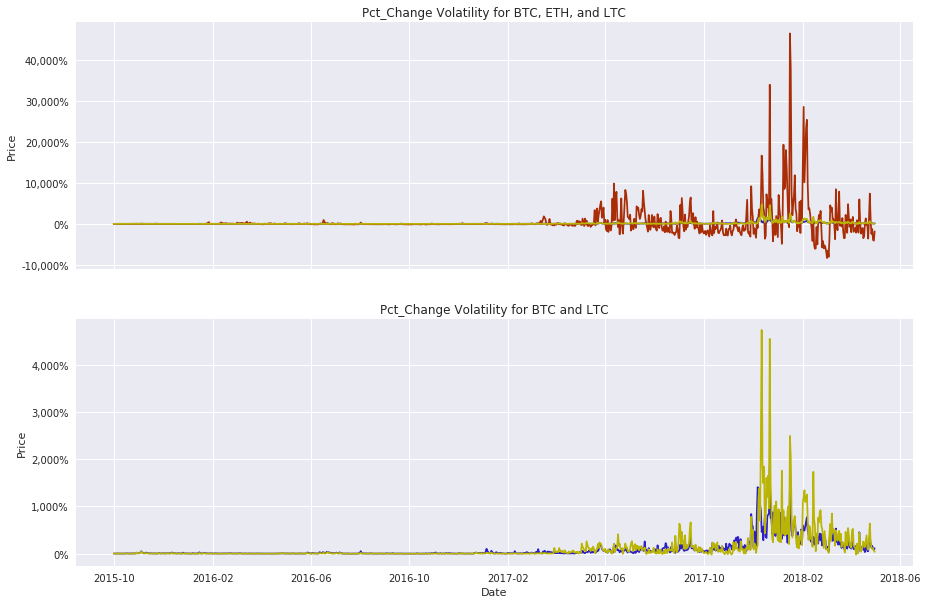

In [20]:
# Question 2.2 (continued):
# Compare the daily volatility of the crypto currencies offered on Coinbase

figure, axes = plt.subplots(2, sharex=True)
figure.set_size_inches(15, 10)

axes[0].plot(vol_pct_change['BTC'], color='#2C1FC4')
axes[0].plot(vol_pct_change['ETH'], color='#A92E07')
axes[0].plot(vol_pct_change['LTC'], color='#BAB504')
axes[0].set_ylabel('Price')
vals = axes[0].get_yticks()
axes[0].set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
axes[0].set_title('Pct_Change Volatility for BTC, ETH, and LTC')

axes[1].plot(vol_pct_change['BTC'], color='#2C1FC4')
axes[1].plot(vol_pct_change['LTC'], color='#BAB504')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price')
vals = axes[1].get_yticks()
axes[1].set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
axes[1].set_title('Pct_Change Volatility for BTC and LTC')

The above graphs paint a much clearer picture of volatility between the cryptos. Similar to percent change in price, ethereum is the leader by a long shot. Interestingly, litecoin proved to be much more volatile that bitcoin

Prices as of 05-01-2018:
S&P 500:  $2,058.20
   DJIA:  $24,099.05
 NASDAQ:  $7,130.70


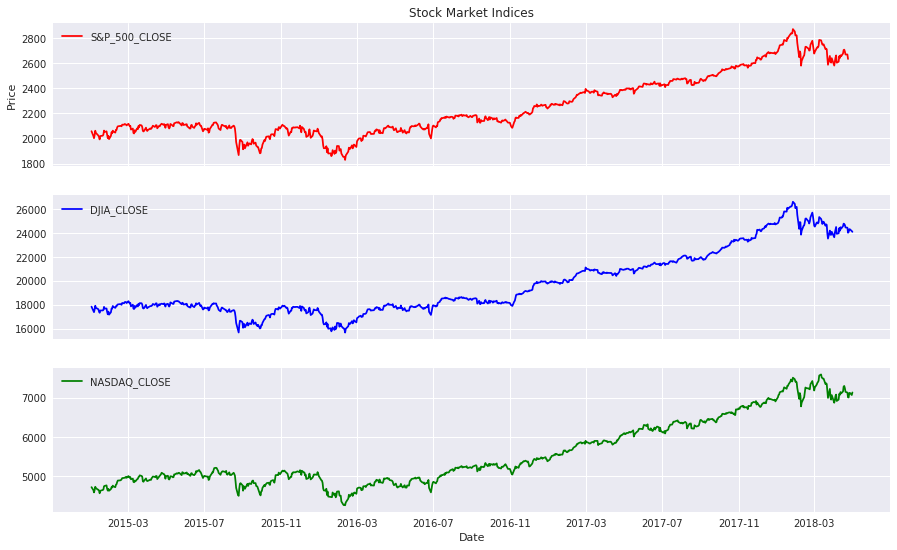

In [21]:
# Question 3.1:
# Compare Crypto prices to the stock market
# Visualize prices for stock market indices
# Remove nan values from dataset (represents weekends and holidays when market was closed)
sandp_clean = main_df['S&P_500_CLOSE'].dropna()
djia_clean = main_df['DJIA_CLOSE'].dropna()
nasdaq_clean = main_df['NASDAQ_CLOSE'].dropna()

figure, axes = plt.subplots(3, sharex=True)
figure.set_size_inches(15, 9)

axes[0].plot(sandp_clean, color='r')
axes[1].plot(djia_clean, color='b')
axes[2].plot(nasdaq_clean, color='g')
axes[0].set_title('Stock Market Indices')
axes[2].set_xlabel('Date')
axes[0].set_ylabel('Price')
axes[0].legend(loc='upper left')
axes[1].legend(loc='upper left')
axes[2].legend(loc='upper left')

print('Prices as of 05-01-2018:\n'
      'S&P 500:  ${0:,.2f}\n'
      '   DJIA:  ${1:,.2f}\n'
      ' NASDAQ:  ${2:,.2f}'.format(sandp_clean[0],
                              djia_clean[-1],
                              nasdaq_clean[-1]))

Now that we have compared price and percent change between crypto currencies, lets see how crypto currencies compare to the market. The above graphs show the prices for indeces that track the S&P 500, Dow Jones Inustrial Average, and NASDAQ Composite, all of which are commonly used as indicators of the US Economy

Prices as of 05-01-2018:
    BTC:  $9104.42
S&P 500:  $2634.56
   DJIA:  $24099.05
 NASDAQ:  $7130.7


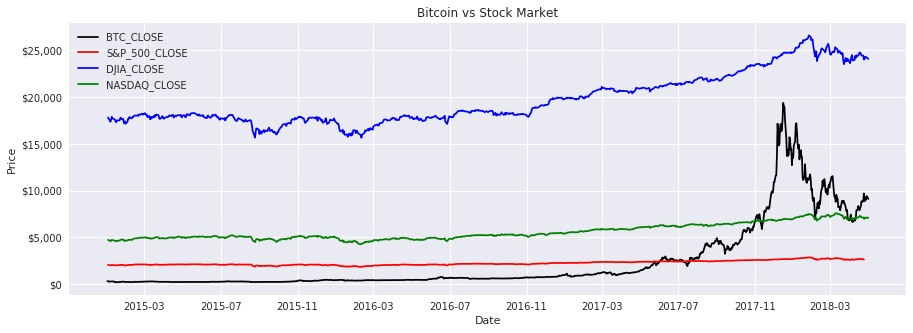

In [22]:
# Question 3.1 (continued):
# Compare Crypto prices to the stock market
# Compare and visualize bitcoin's price to that of S&P 500, DJIA, and NASDAQ
figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

axes.plot(main_df['BTC_CLOSE'], color='k')
axes.plot(sandp_clean, color='r')
axes.plot(djia_clean, color='b')
axes.plot(nasdaq_clean, color='g')
axes.set_title('Bitcoin vs Stock Market')
axes.set_xlabel('Date')
axes.set_ylabel('Price')
vals = axes.get_yticks()
axes.set_yticklabels(['${:,.0f}'.format(x) for x in vals])
axes.legend(loc='upper left')

print('Prices as of 05-01-2018:\n'
      '    BTC:  ${0}\n'
      'S&P 500:  ${1}\n'
      '   DJIA:  ${2}\n'
      ' NASDAQ:  ${3}'.format(main_df['BTC_CLOSE'][-1].round(2),
                              sandp_clean[-1].round(2),
                              djia_clean[-1].round(2),
                              nasdaq_clean[-1].round(2)))

The above graph shows the price changes for the S&P 500, Dow Jones Inustrial Average, NASDAQ Composite, and Bitcoin all together. Within ~2.5 years, Bitcoin passed both the S&P and the NASDAQ and at its peak was on track to pass the DOW.

Note: For comparisons between cryptos and other non-crypto indices, bitcoin will act as a proxy for all cryptos and will be colored black for ease of recognition

In [23]:
# Question 3.2:
# Compare Crypto percent changes to the stock market
# Normalize prices by using percent change from specific date
# Comparing BTC to stock market
pct_change2 = pd.DataFrame
btc = main_df['BTC_CLOSE']
tkr_list = [btc, sandp_clean, djia_clean, nasdaq_clean]
for tkr in tkr_list:
    data = (tkr-tkr[0]) / tkr[0] * 100.0
    if pct_change2.empty:
        pct_change2 = data
    else:
        pct_change2 = pd.concat([pct_change2, data], axis=1) 
pct_change2.head()

,BTC_CLOSE,S&P_500_CLOSE,DJIA_CLOSE,NASDAQ_CLOSE
timestamp,,,,
2015-01-01,0.000000,NaN,NaN,NaN
2015-01-02,0.431005,0.000000,0.000000,0.000000
2015-01-03,-10.363613,NaN,NaN,NaN
2015-01-04,-16.181013,NaN,NaN,NaN
2015-01-05,-13.007999,-1.827811,-1.858016,-1.570622


Correlations in percent change from 01-01-2015:
BTC-S&P 500: 0.844
   BTC-DJIA: 0.871
 BTC-NASDAQ: 0.849


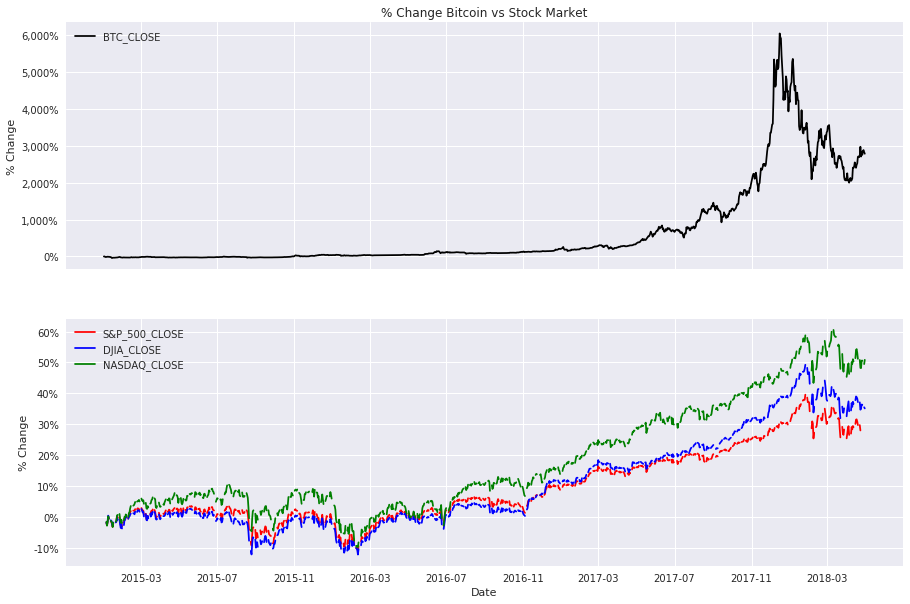

In [24]:
# Question 3.2 (continued):
# Compare Crypto prices to the stock market
# Visualize price changes between BTC and Stock Market
figure, axes = plt.subplots(2, sharex=True)
figure.set_size_inches(15, 10)

axes[0].plot(pct_change2['BTC_CLOSE'], color='k')
axes[0].set_title('% Change Bitcoin vs Stock Market')
axes[0].set_ylabel('% Change')
vals = axes[0].get_yticks()
axes[0].set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
axes[0].legend(loc='upper left')

axes[1].plot(pct_change2['S&P_500_CLOSE'], color='r')
axes[1].plot(pct_change2['DJIA_CLOSE'], color='b')
axes[1].plot(pct_change2['NASDAQ_CLOSE'], color='g')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('% Change')
vals = axes[1].get_yticks()
axes[1].set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
axes[1].legend(loc='upper left')

btc_sandp = pct_change2['BTC_CLOSE'].corr(pct_change2['S&P_500_CLOSE']).round(3)
btc_djia = pct_change2['BTC_CLOSE'].corr(pct_change2['DJIA_CLOSE']).round(3)
btc_nasdaq = pct_change2['BTC_CLOSE'].corr(pct_change2['NASDAQ_CLOSE']).round(3)
print('Correlations in percent change from 01-01-2015:\n'
      'BTC-S&P 500: {0}\n'
      '   BTC-DJIA: {1}\n'
      ' BTC-NASDAQ: {2}'.format(btc_sandp, btc_djia, btc_nasdaq))

The above graphs show the growth rate of the bitcoin and the growth rates of the 3 stock market indicators. From these graphs 2 things are clear: 
1. Bitcoin has far outpaced the market 
2. The 3 market indicators all have very similar growth rates, with the NASDAQ leading the charge

Another thing to note is the correlation between Bitcoin and the market indeces. Bitcoin is very correlated with each, though not as correlated as with its fellow crypto currencies. This indicates that the crypto currency has grown with the market, and that if a downturn occurs Bitcoin may go down with it

In [25]:
# Question 4:
# Compare percent changes of crypto currencies and various industries in the global market
# Normalize prices by using percent change from specific date
pct_change3 = pd.DataFrame
energy_clean = main_df['ENERGY_CLOSE'].dropna()
financial_clean = main_df['FINANCIAL_CLOSE'].dropna()
retail_clean = main_df['RETAIL_CLOSE'].dropna()
tech_clean = main_df['TECH_CLOSE'].dropna()

tkr_list = [btc, energy_clean, financial_clean, retail_clean, tech_clean]
for tkr in tkr_list:
    data = (tkr-tkr[0]) / tkr[0] * 100.0
    if pct_change3.empty:
        pct_change3 = data
    else:
        pct_change3 = pd.concat([pct_change3, data], axis=1) 
pct_change3.head()

,BTC_CLOSE,ENERGY_CLOSE,FINANCIAL_CLOSE,RETAIL_CLOSE,TECH_CLOSE
timestamp,,,,,
2015-01-01,0.000000,NaN,NaN,NaN,NaN
2015-01-02,0.431005,0.000000,0.000000,0.000000,0.000000
2015-01-03,-10.363613,NaN,NaN,NaN,NaN
2015-01-04,-16.181013,NaN,NaN,NaN,NaN
2015-01-05,-13.007999,-4.136776,-2.102752,-1.132859,-1.526594


Correlations in percent change from 01-01-2015:
   BTC-Energy: 0.295
BTC-Financial: 0.831
   BTC-Retail: 0.029
     BTC-Tech: 0.852


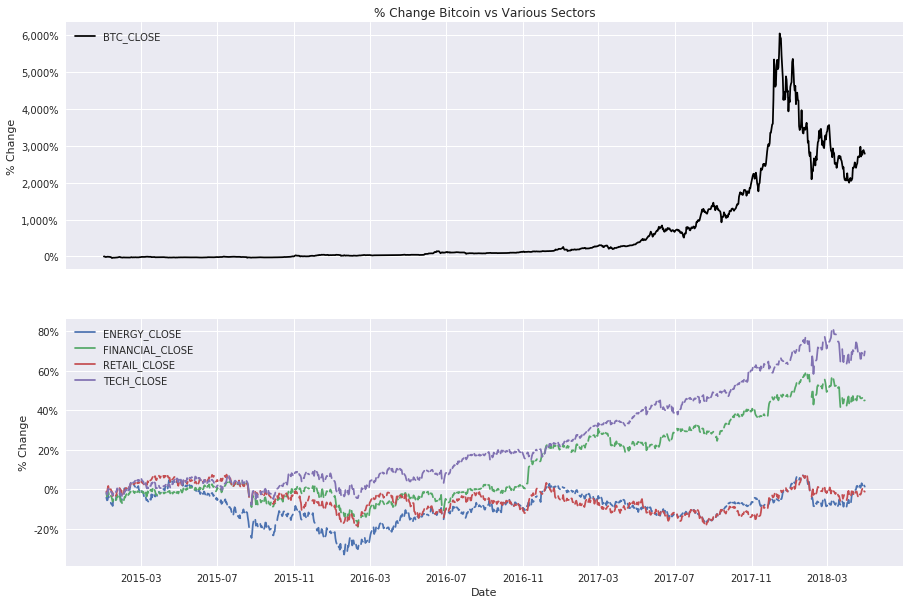

In [26]:
# Question 4 (conitnued):
# Compare percent changes of crypto currencies and various industries in the global market
# Visualize price changes between BTC and Sector Indeces
figure, axes = plt.subplots(2, sharex=True)
figure.set_size_inches(15, 10)

axes[0].plot(pct_change3['BTC_CLOSE'], color='k')
axes[0].set_title('% Change Bitcoin vs Various Sectors')
axes[0].set_ylabel('% Change')
vals = axes[0].get_yticks()
axes[0].set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
axes[0].legend(loc='upper left')

axes[1].plot(pct_change3['ENERGY_CLOSE'])
axes[1].plot(pct_change3['FINANCIAL_CLOSE'])
axes[1].plot(pct_change3['RETAIL_CLOSE'])
axes[1].plot(pct_change3['TECH_CLOSE'])

axes[1].set_xlabel('Date')
axes[1].set_ylabel('% Change')
vals = axes[1].get_yticks()
axes[1].set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
axes[1].legend(loc='upper left')

btc_energy = pct_change3['BTC_CLOSE'].corr(pct_change3['ENERGY_CLOSE']).round(3)
btc_financial = pct_change3['BTC_CLOSE'].corr(pct_change3['FINANCIAL_CLOSE']).round(3)
btc_retail = pct_change3['BTC_CLOSE'].corr(pct_change3['RETAIL_CLOSE']).round(3)
btc_tech = pct_change3['BTC_CLOSE'].corr(pct_change3['TECH_CLOSE']).round(3)
print('Correlations in percent change from 01-01-2015:\n'
      '   BTC-Energy: {0}\n'
      'BTC-Financial: {1}\n'
      '   BTC-Retail: {2}\n'
      '     BTC-Tech: {3}'.format(btc_energy, btc_financial, btc_retail, btc_tech))

The above graphs show the growth rate of Bitcoin, and the growth rate of 4 industries within the US.
Not surprisingly, Bitcoin once again has grown much faster than any of the sectors.

An interesting observation is that amongt the sectors provided, Bitcoin is highly correlated with Financial and Tech, and has very little correlation with Retail and Energy. 

Bitcoin is a financial instrument based on a new technology - blockchain. Is it possible that the rise in bitcoin has boosted the returns of these sectors? Or is it that the growth in these sectors have given rise to Bitcoin andd other crypto currencies?

     Tech: 69.68%
   NASDAQ: 50.86%
Financial: 44.93%
     DJIA: 35.14%
  S&P 500: 28.00%
   Energy: 1.38%
   Retail: -1.17%


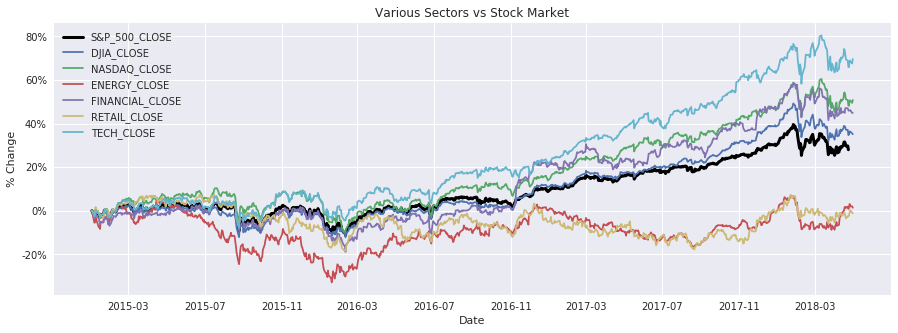

In [27]:
# Question 5:
# Compare Various Sectors vs the Stock Market
figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

axes.plot(pct_change2['S&P_500_CLOSE'].dropna(), color='k', linewidth=3)
axes.plot(pct_change2['DJIA_CLOSE'].dropna())
axes.plot(pct_change2['NASDAQ_CLOSE'].dropna())
axes.plot(pct_change3['ENERGY_CLOSE'].dropna())
axes.plot(pct_change3['FINANCIAL_CLOSE'].dropna())
axes.plot(pct_change3['RETAIL_CLOSE'].dropna())
axes.plot(pct_change3['TECH_CLOSE'].dropna())

axes.set_title('Various Sectors vs Stock Market')
axes.set_xlabel('Date')
axes.set_ylabel('% Change')
vals = axes.get_yticks()
axes.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])
axes.legend(loc='upper left')

print('     Tech: {0:,.2f}%\n'
       '   NASDAQ: {1:,.2f}%\n'
       'Financial: {2:,.2f}%\n'
       '     DJIA: {3:,.2f}%\n'
       '  S&P 500: {4:,.2f}%\n'
       '   Energy: {5:,.2f}%\n'
       '   Retail: {6:,.2f}%'.format(pct_change3['TECH_CLOSE'].dropna()[-1],
                                       pct_change2['NASDAQ_CLOSE'].dropna()[-1],
                                       pct_change3['FINANCIAL_CLOSE'].dropna()[-1],
                                       pct_change2['DJIA_CLOSE'].dropna()[-1],
                                       pct_change2['S&P_500_CLOSE'].dropna()[-1],
                                       pct_change3['ENERGY_CLOSE'].dropna()[-1],
                                       pct_change3['RETAIL_CLOSE'].dropna()[-1]))

In order to provide a well rounded report, the above graph shows the growth rates of the 3 stock market indices, as well as the 4 sector indices. The S&P 500 (the most commonly referenced market indicator) is shown in bold black. The two leading indeces are the technology sector, followed by the NASDAQ Composite. This makes a lot of sense actually, since the NASDAQ is comprised of a large number of tech companies. 

This graph also shows that an investor who only invested in tech would have outperformed that stock market by over 2x!

In [28]:
#Question 6: 
# Analyze price changes for each day of the week
# Calculate daily percent changes for each crypto currency
pct_change = main_df[['BTC_CLOSE', 'BCH_CLOSE', 'ETH_CLOSE', 'LTC_CLOSE',]]
pct_change = pct_change.pct_change()

In [29]:
#Question 6 (continued): 
# Analyze price changes for each day of the week
# Add a days of the week column to the dataframe
import datetime
from datetime import date
import calendar
day_of_week = pct_change.index.weekday
days_list = [calendar.day_name[day] for day in day_of_week]
pct_change['Weekday'] = days_list

In [30]:
#Question 6 (continued): 
# Analyze price changes for each day of the week
# Group dataframe by day of the week
day = pct_change.groupby('Weekday')

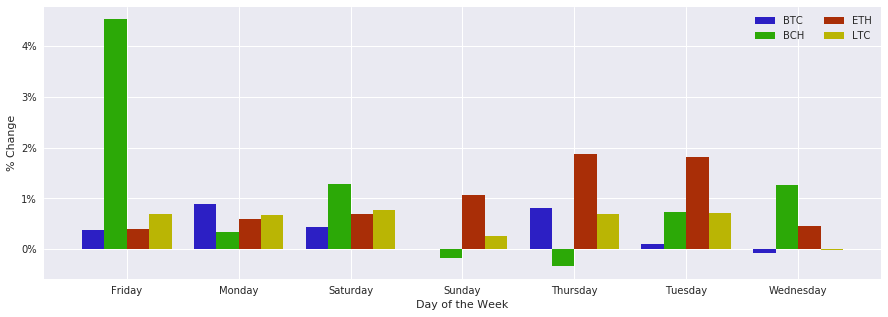

In [31]:
#Question 6: 
# Analyze price changes for each day of the week
figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

ind = np.arange(7)
axes.bar(ind-.2, day['BTC_CLOSE'].mean(), width=.2, color='#2C1FC4')
axes.bar(ind, day['BCH_CLOSE'].mean(), width=.2, color='#2CA907')
axes.bar(ind + .2, day['ETH_CLOSE'].mean(), width=.2, color='#A92E07')
axes.bar(ind + .4, day['LTC_CLOSE'].mean(), width=.2, color='#BAB504')
axes.set_xlabel('Day of the Week')
axes.set_xticks(ind + .2 / 2)
axes.set_xticklabels(('Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'))

axes.set_ylabel('% Change')
vals = axes.get_yticks()
axes.set_yticklabels(['{:,.0f}%'.format(x*100) for x in vals])
axes.legend(['BTC', 'BCH', 'ETH', 'LTC'], ncol=2, loc='upper right')

The above bar graph displays the percent change breakdown for each crypto for each day of the week. BCH Friday percent change clearly sticks out, but this should be considered with caution. BCH was not publicly listed until recently, meaning that there is significantly less data available, thus this change could be due to a few large movement Friday's that are not representative of the whole. 

Apart from this observation there appears to be no day of the week that is statistically significant for the other cryptos 

[Text(0,0,'Friday'),
 Text(0,0,'Monday'),
 Text(0,0,'Saturday'),
 Text(0,0,'Sunday'),
 Text(0,0,'Thursday'),
 Text(0,0,'Tuesday'),
 Text(0,0,'Wednesday')]

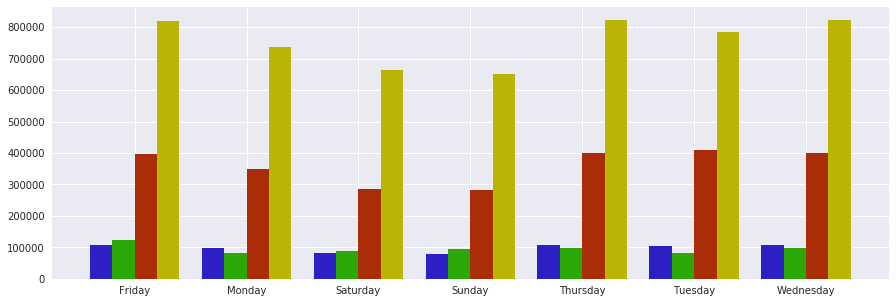

In [32]:
# Question 7:
# Analyze trade volume for each day of the week
day_of_week = main_df.index.weekday
days_list = [calendar.day_name[day] for day in day_of_week]
main_df['Weekday'] = days_list

volume_by_day = main_df.groupby('Weekday')
figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

ind = np.arange(7)
axes.bar(ind-.2, volume_by_day['BTC_VOLUME'].mean(), width=.2, color='#2C1FC4')
axes.bar(ind, volume_by_day['BCH_VOLUME'].mean(), width=.2, color='#2CA907')
axes.bar(ind + .2, volume_by_day['ETH_VOLUME'].mean(), width=.2, color='#A92E07')
axes.bar(ind + .4, volume_by_day['LTC_VOLUME'].mean(), width=.2, color='#BAB504')
axes.set_xticks(ind + .2 / 2)
axes.set_xticklabels(('Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'))

The above graph displays average volume traded by day of the week. From this graph it appears that Saturday and Sunday experience slightly less volume than the rest of the week. This makes sense as many firms that trade large quantities of crypto currencies may be closed on the weekend.

Note: The volume data provided by Alpha Vantage appears to fail to specify if the reported number is in thousands, millions, billions, etc. For this reason LTC appears to have a much larger trade volume though in all likelihood the number reported in this may be in thousands while BTC and BCH are in millions. Despite this, the overall trend in volume should not be effected, and the graph still yields the same conclusion

In [33]:
# Question 8:
# Analyze correlation between news headlines and crypto prices
# Import wiki-current-events file and convert from json to pandas dataframe
news_dict = {}
import json
with open('data-sets/wiki_current_events.json', 'r') as f:
    global_events = json.load(f)
    for ptr, year in enumerate(global_events):
        for ptr2, month in enumerate(global_events[ptr]['news']):
            month_num = ptr2 + 1
            for ptr3, date in enumerate(global_events[ptr]['news'][ptr2]['news']):
                formatted_date = (str(global_events[ptr]['year']) + '-' + str(month_num)
                      + '-' + str(global_events[ptr]['news'][ptr2]['news'][ptr3]['date']))
                date_index = datetime.datetime.strptime(formatted_date, '%Y-%m-%d')
                news_dict[date_index] = global_events[ptr]['news'][ptr2]['news'][ptr3]['news']
    news_df = pd.Series(news_dict, name='NEWS_EVENTS')

In [34]:
# Question 8 (continued):
# Analyze correlation between news headlines and crypto prices
# Only look at dates we are interested in (2015-2017; 2018 data not available)
news_df_recent = news_df.loc['2015-01-01':]
btc_recent = pct_change.loc[:'2017-12-31', 'BTC_CLOSE']
news_df_recent = pd.concat([news_df_recent, btc_recent], axis=1)
news_df_recent.head()

,NEWS_EVENTS,BTC_CLOSE
timestamp,,
2015-01-01,"[Mario Cuomo, former governor of the U.S. stat...",NaN
2015-01-02,[The MS Norman Atlantic ferry fire death toll ...,0.004310
2015-01-03,"[A prison in Bruges, Belgium, will euthanise s...",-0.107483
2015-01-04,[A suicide car bomber detonates near a militar...,-0.064900
2015-01-05,"[Two militants, one wearing a suicide vest, ki...",0.037856


[Text(0,0,'  0%'),
 Text(0,0,'  5%'),
 Text(0,0,' 10%'),
 Text(0,0,' 15%'),
 Text(0,0,' 20%'),
 Text(0,0,' 25%'),
 Text(0,0,' 30%')]

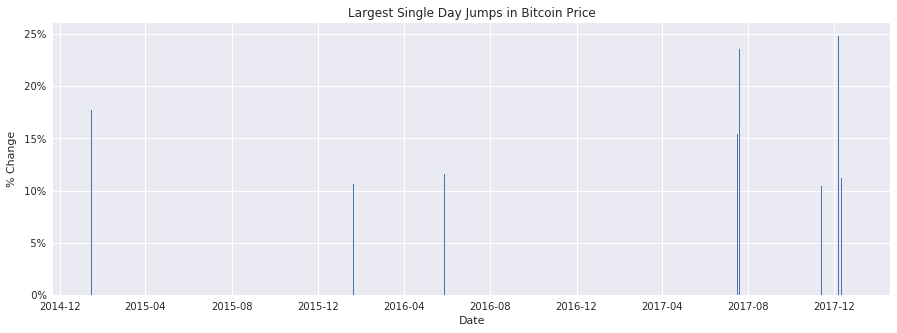

In [35]:
# Question 8 (continued):
# Analyze correlation between news headlines and crypto prices
# Visualize the 15 days with the largest jump in price for BTC
btc_growth = news_df_recent['BTC_CLOSE'].nlargest(15)
figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

axes.bar(btc_growth.index, btc_growth)
axes.set_title('Largest Single Day Jumps in Bitcoin Price')
axes.set_ylabel('% Change')
axes.set_xlabel('Date')

vals = axes.get_yticks()
axes.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

In [36]:
# Question 8 (continued):
# Analyze correlation between news headlines and crypto prices
# Record the news headlines that occured on these days
for date in btc_growth.index:
    print(str(date) + ':')
    for ptr, article in enumerate(news_df[date]):
        print(str(ptr + 1) + '. ' + str(article))
    print('\n')

2017-12-07 00:00:00:
1. European migrant crisis, Treaty on European Union
2. Eurostadium in Brussels, Belgium, is unselected as a host for the UEFA Euro 2020 football competition, ceding its place for group stage matches to Wembley Stadium in London, England. Prime Minister of Belgium Charles Michel says the city made the error of wanting to build a stadium outside its territory.
3. The President of Turkey embarks on a two-day state visit of Greece. Recep Tayyip Erdoğan's démarche is a first in 65 years.
4. Voters in Nepal go to the polls for the second round of a historic legislative election. The turnout is 67%, up from 65% in the first round.
5. 2017 United States political sexual scandals
6. The European Commission orders Poland, the Czech Republic and Hungary to court over their refusal to incorporate more refugees. This is the third step in a process that may lead to fines and loss of the countries' voting rights in the European Union.
7. United States Senator Al Franken announce

[Text(0,0,'-22%'),
 Text(0,0,'-20%'),
 Text(0,0,'-18%'),
 Text(0,0,'-15%'),
 Text(0,0,'-12%'),
 Text(0,0,'-10%'),
 Text(0,0,' -7%'),
 Text(0,0,' -5%'),
 Text(0,0,' -2%'),
 Text(0,0,'  0%')]

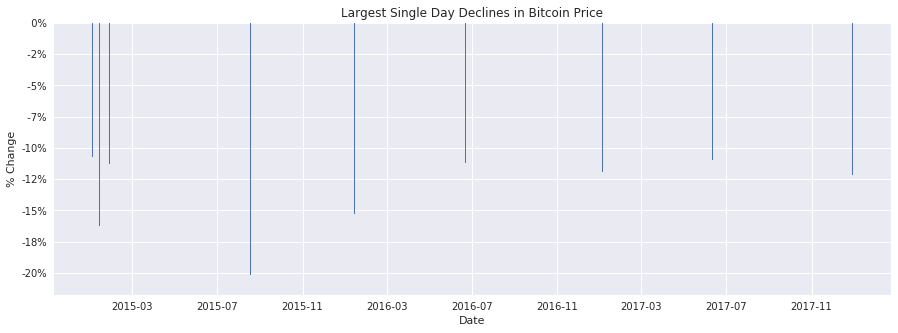

In [37]:
# Question 8 (continued):
# Analyze correlation between news headlines and crypto prices
# Visualize the 15 days with the largest decline in price for BTC
btc_shrink = news_df_recent['BTC_CLOSE'].nsmallest(15)
figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

axes.bar(btc_shrink.index, btc_shrink)
axes.set_title('Largest Single Day Declines in Bitcoin Price')
axes.set_ylabel('% Change')
axes.set_xlabel('Date')

vals = axes.get_yticks()
axes.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

In [38]:
# Question 8 (continued):
# Analyze correlation between news headlines and crypto prices
# Record the news headlines that occured on these days
for date in btc_shrink.index:
    print(str(date) + ':')
    for ptr, article in enumerate(news_df[date]):
        print(str(ptr + 1) + '. ' + str(article))
    print('\n')

2015-01-14 00:00:00:
1. Floods devastate Mozambique and Malawi, with at least 73 deaths and over 70,000 homeless.
2. The U.S. Secret Service removes four of its highest-ranking leaders while a fifth one retires. The continuing restructuring and fallout stem from a string of public security lapses beginning with the misconduct at the 6th Summit of the Americas. The most recent stage of the restructuring began in October 2014 with the resignation of then-Director Julia Pierson.
3. A collision between a train and a prison transport bus near Penwell, Texas leaves at least eight prisoners and two corrections officers dead.
4. A bomb destroys a transmission tower in Pagalungan leaving much of the Philippine provinces of Maguindanao and North Cotabato without power.
5. On the second day of his papal visit to Sri Lanka, Pope Francis canonizes Saint Joseph Vaz at a beachfront park at the Indian Ocean, and later visits the northern portion of the island for a prayer service at the Sri Lankan Shr

The above 4 cells contain the following:
1. Visualization of the 15 largest single day gains in Bitcoin price
2. News events that were reported on the same day as these gains
3. Visualization of the 15 largest single day losses in Bitcoin price
4. News events that were reported on the same day as these losses

Of all the news headlines recorded on days of major price changes in bitcoin, only one mentions bitcoin: "The digital cryptocurrency Bitcoin loses a third of its value within 24 hours." (2017-12-22)

This implies that if geo-political events have an affect on crypto prices, they are generally not directly related to crypto currencies.

Further analysis of this data using regex and textual analysis tools could result in intersting findings

Note: News articles were retireved from wikipedia current events dataset



In [39]:
# Question 9:
# Analyze effect of specific words in the news on crypto prices
# Which dates mention "Trump" and how does bitcoin price react?
date_list = []
news_articles = news_df_recent['NEWS_EVENTS']
for index, date in news_articles.iteritems():
    for article in date:
        if 'Trump' in article:
            date_list.append(index)
trump_mentions = np.unique(date_list)

Average Effect of Mentions of "Trump" in News: 0.54%


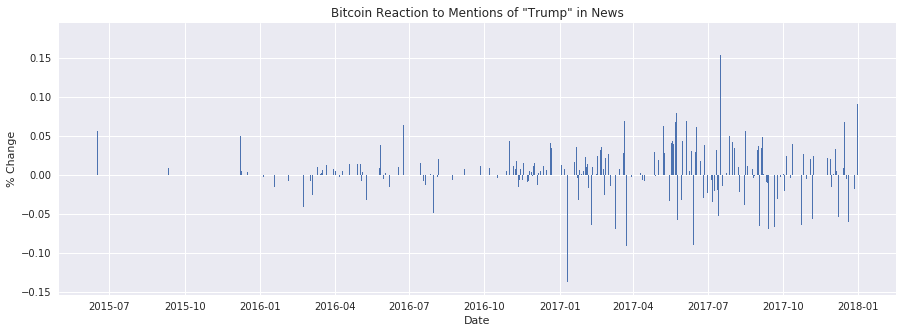

In [40]:
# Question 9 (continued):
# Analyze effect of specific words in the news on crypto prices
# Which dates mention "Trump" and how does bitcoin price react?

trump_price_effect = news_df_recent['BTC_CLOSE'][trump_mentions]
figure, axes = plt.subplots()
figure.set_size_inches(15, 5)
axes.set_title('Bitcoin Reaction to Mentions of "Trump" in News')
axes.set_ylabel('% Change')
axes.set_xlabel('Date')

axes.bar(trump_price_effect.index, trump_price_effect)

average_change = trump_price_effect.mean()
print('Average Effect of Mentions of "Trump" in News: {:.2f}%'.format(average_change*100))

The above graph depicts Bitcoin's price changes on days when Donald Trump was featured in the news. The average price change in Bitcoin on days when Trump was mentioned in the headlines is .54%, implying that mentions of the president may be slightly positively correlated with bitcoin prices.

Average Effect of Mentions of "Korea" in News: 0.38%


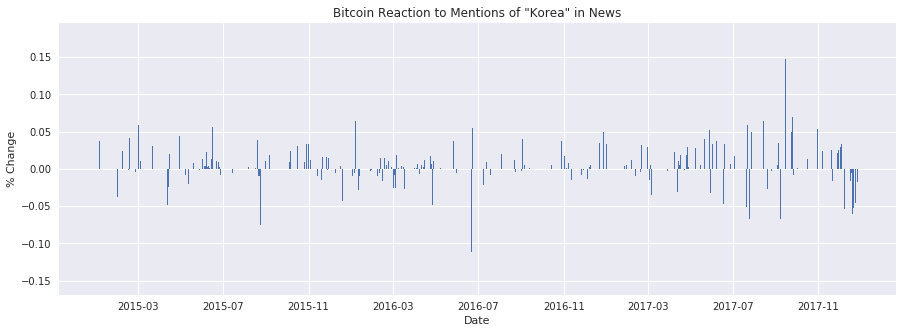

In [41]:
# Question 9 (continued):
# Analyze effect of specific words in the news on crypto prices
# Which dates mention "Korea" and how does bitcoin price react?
date_list = []
news_articles = news_df_recent['NEWS_EVENTS']
for index, date in news_articles.iteritems():
    for article in date:
        if 'Korea' in article:
            date_list.append(index)
korea_mentions = np.unique(date_list)

korea_price_effect = news_df_recent['BTC_CLOSE'][korea_mentions]
figure, axes = plt.subplots()
figure.set_size_inches(15, 5)
axes.set_title('Bitcoin Reaction to Mentions of "Korea" in News')
axes.set_ylabel('% Change')
axes.set_xlabel('Date')

axes.bar(korea_price_effect.index, korea_price_effect)

average_change = korea_price_effect.mean()
print('Average Effect of Mentions of "Korea" in News: {:.2f}%'.format(average_change*100))

The above graph depicts Bitcoin's price changes on days when "Korea" (North or South) was featured in the news. The average price change in Bitcoin on days when Korea was mentioned in the headlines is .38%. Korea was a chosen search word because South Korea is a hub for crypto currencies, and North Korea has been a source of political turmoil and uncertainty.

In [42]:
# Question 10:
# Analyze cypto percent changes on a mintely, hourly, and daily basis
# Load minute data
minute_data = pd.read_csv('data-sets/coinbase.csv', 
                          parse_dates=['Timestamp'], 
                          index_col='Timestamp',
                          usecols=['Timestamp', 'BTC-USD', 'BCH-USD', 'ETH-USD', 'LTC-USD'])
minute_data.columns = minute_data.columns.str.replace('-', '_')
minute_data.head()

,BTC_USD,BCH_USD,ETH_USD,LTC_USD
Timestamp,,,,
2018-03-05 05:02:00,11510.00,1284.01,864.04,211.51
2018-03-05 05:03:00,11506.00,1284.01,864.01,211.49
2018-03-05 05:04:00,11506.00,1284.01,864.01,211.49
2018-03-05 05:05:00,11506.01,1284.00,863.98,211.49
2018-03-05 05:06:00,11524.03,1284.01,863.99,211.49


In [43]:
# Question 10 (continued):
# Analyze cypto percent changes on a mintely, hourly, and daily basis
# Calculate Percent Change of Data
minute_pct_change = pd.DataFrame
tkr_list = [minute_data['BTC_USD'], minute_data['BCH_USD'], minute_data['ETH_USD'], minute_data['LTC_USD']]
for tkr in tkr_list:
    data = (tkr-tkr[0]) / tkr[0] * 100.0
    if minute_pct_change.empty:
        minute_pct_change = data
    else:
        minute_pct_change = pd.concat([minute_pct_change, data], axis=1) 

In [44]:
# Question 10 (continued):
# Analyze cypto percent changes on a mintely, hourly, and daily basis
# Resample the data

_1hour = minute_pct_change.resample('1H', how='first')
_1day = minute_pct_change.resample('1D', how='first')

/home/ubuntu/.pyenv/versions/3.6.2/envs/systems-and-tech-python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  """
/home/ubuntu/.pyenv/versions/3.6.2/envs/systems-and-tech-python/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  


Correlations on Minute Basis:
          BTC_USD   BCH_USD   ETH_USD   LTC_USD
BTC_USD  1.000000  0.864542  0.950421  0.932302
BCH_USD  0.864542  1.000000  0.853159  0.821358
ETH_USD  0.950421  0.853159  1.000000  0.933427
LTC_USD  0.932302  0.821358  0.933427  1.000000


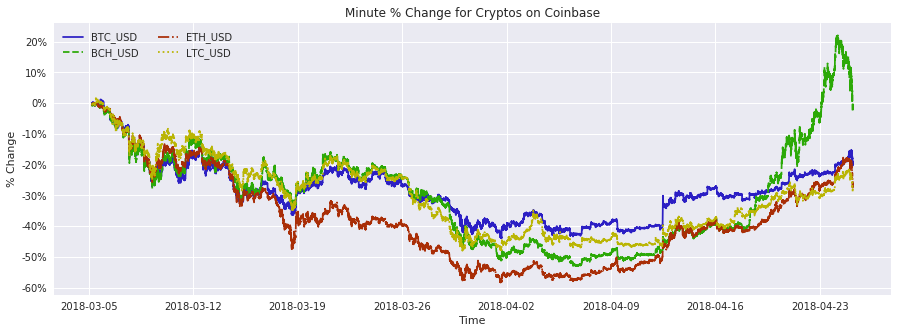

In [45]:
# Question 10 (continued):
# Analyze cypto percent changes on a mintely, hourly, and daily basis
# Graph data minute data

figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

axes.plot(minute_pct_change['BTC_USD'], color='#2C1FC4', linestyle='solid')
axes.plot(minute_pct_change['BCH_USD'], color='#2CA907', linestyle='dashed')
axes.plot(minute_pct_change['ETH_USD'], color='#A92E07', linestyle='dashdot')
axes.plot(minute_pct_change['LTC_USD'], color='#BAB504', linestyle='dotted')

axes.set_xlabel('Time')
axes.set_ylabel('% Change')
vals = axes.get_yticks()
axes.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

axes.set_title('Minute % Change for Cryptos on Coinbase')
axes.legend(ncol=2, loc='upper left')

print('Correlations on Minute Basis:')
print(minute_pct_change.corr())

Correlations on Hourly Basis:
          BTC_USD   BCH_USD   ETH_USD   LTC_USD
BTC_USD  1.000000  0.864420  0.950348  0.932413
BCH_USD  0.864420  1.000000  0.853214  0.821021
ETH_USD  0.950348  0.853214  1.000000  0.933488
LTC_USD  0.932413  0.821021  0.933488  1.000000


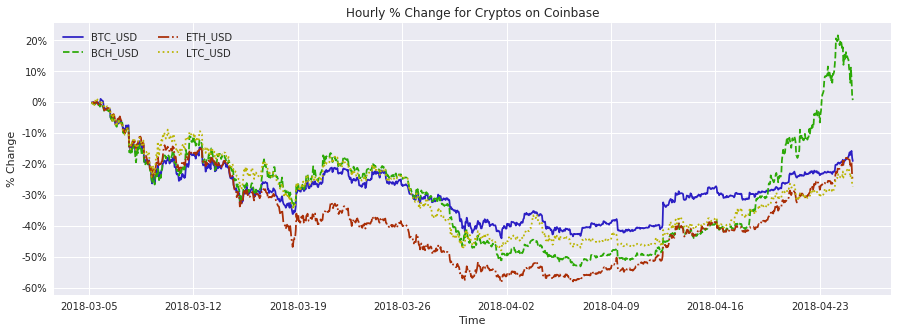

In [46]:
# Question 10 (continued):
# Analyze cypto percent changes on a mintely, hourly, and daily basis
# Graph data hourly data

figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

axes.plot(_1hour['BTC_USD'], color='#2C1FC4', linestyle='solid')
axes.plot(_1hour['BCH_USD'], color='#2CA907', linestyle='dashed')
axes.plot(_1hour['ETH_USD'], color='#A92E07', linestyle='dashdot')
axes.plot(_1hour['LTC_USD'], color='#BAB504', linestyle='dotted')

axes.set_xlabel('Time')
axes.set_ylabel('% Change')
vals = axes.get_yticks()
axes.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

axes.set_title('Hourly % Change for Cryptos on Coinbase')
axes.legend(ncol=2, loc='upper left')

print('Correlations on Hourly Basis:')
print(_1hour.corr())

Correlations on Daily Basis:
          BTC_USD   BCH_USD   ETH_USD   LTC_USD
BTC_USD  1.000000  0.864420  0.950348  0.932413
BCH_USD  0.864420  1.000000  0.853214  0.821021
ETH_USD  0.950348  0.853214  1.000000  0.933488
LTC_USD  0.932413  0.821021  0.933488  1.000000


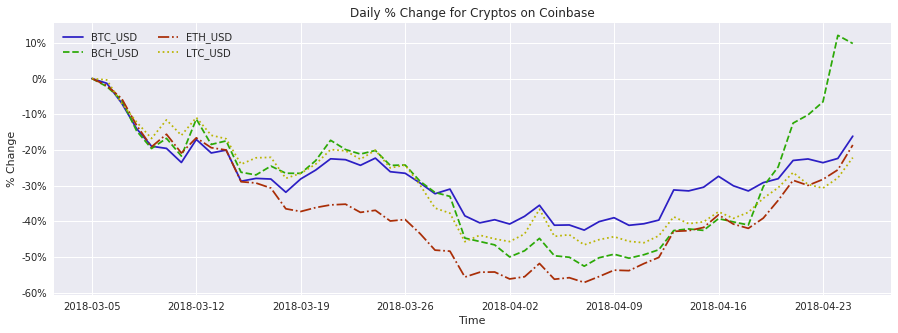

In [47]:
# Question 10 (continued):
# Analyze cypto percent changes on a mintely, hourly, and daily basis
# Graph data hourly data

figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

axes.plot(_1day['BTC_USD'], color='#2C1FC4', linestyle='solid')
axes.plot(_1day['BCH_USD'], color='#2CA907', linestyle='dashed')
axes.plot(_1day['ETH_USD'], color='#A92E07', linestyle='dashdot')
axes.plot(_1day['LTC_USD'], color='#BAB504', linestyle='dotted')

axes.set_xlabel('Time')
axes.set_ylabel('% Change')
vals = axes.get_yticks()
axes.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

axes.set_title('Daily % Change for Cryptos on Coinbase')
axes.legend(ncol=2, loc='upper left')

print('Correlations on Daily Basis:')
print(_1hour.corr())

The above graphs show the relationships between the various cryptos on a minute, hourly, and daily basis. Despite increasing the granularity, the correlations between each currency remanes roughly the same, all of which are very high. It is interesting to note that BCH has the lowest correlation due to its recent out performance. However, it appears that even in the last couple of days this has begun to reverse, and the crypto is reverting to the norm.

What is also amazing to note about these graphs is that in less than a months time many of these cryptos lost over half there value and then recovered most of it shortly there after!!

In [48]:
# Question 11:
# Analyse a random day to look at more granular data
# Pick random day and find percent change
zoomed_in = minute_data.loc['2018-04-11 05:00:00': '2018-04-12 04:59:00']

zoomed_pct_change = pd.DataFrame
tkr_list = [zoomed_in['BTC_USD'], zoomed_in['BCH_USD'], zoomed_in['ETH_USD'], zoomed_in['LTC_USD']]
for tkr in tkr_list:
    data = (tkr-tkr[0]) / tkr[0] * 100.0
    if zoomed_pct_change.empty:
        zoomed_pct_change = data
    else:
        zoomed_pct_change = pd.concat([zoomed_pct_change, data], axis=1) 

Correlations on Daily Basis:
          BTC_USD   BCH_USD   ETH_USD   LTC_USD
BTC_USD  1.000000  0.544217  0.775613  0.763029
BCH_USD  0.544217  1.000000  0.898168  0.816966
ETH_USD  0.775613  0.898168  1.000000  0.885648
LTC_USD  0.763029  0.816966  0.885648  1.000000


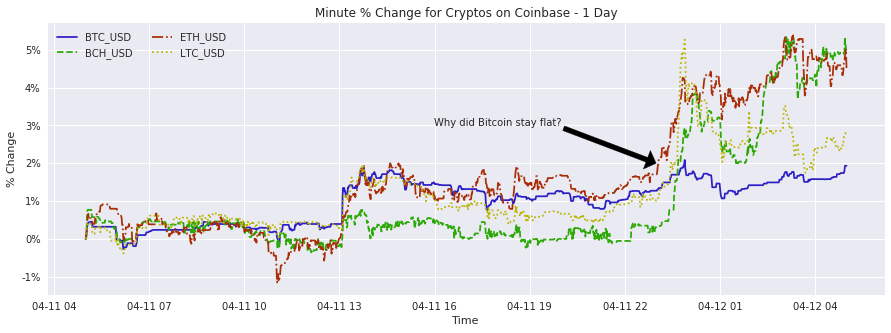

In [49]:
# Question 11 (continued):
# Analyse a random day to look at more granular data
# Graph data
figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

axes.plot(zoomed_pct_change['BTC_USD'], color='#2C1FC4', linestyle='solid')
axes.plot(zoomed_pct_change['BCH_USD'], color='#2CA907', linestyle='dashed')
axes.plot(zoomed_pct_change['ETH_USD'], color='#A92E07', linestyle='dashdot')
axes.plot(zoomed_pct_change['LTC_USD'], color='#BAB504', linestyle='dotted')

axes.set_xlabel('Time')
axes.set_ylabel('% Change')
vals = axes.get_yticks()
axes.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

axes.set_title('Minute % Change for Cryptos on Coinbase - 1 Day')
axes.legend(ncol=2, loc='upper left')

date_num = datetime.datetime.strptime('2018-04-11 22:59:00', '%Y-%m-%d %H:%M:%S')
date_num = matplotlib.dates.date2num(date_num)

date_num2 = datetime.datetime.strptime('2018-04-11 15:59:00', '%Y-%m-%d %H:%M:%S')
date_num2 = matplotlib.dates.date2num(date_num2)

axes.annotate(
    'Why did Bitcoin stay flat?', 
    xy=(date_num, 2), 
    xytext=(date_num2, 3),
    arrowprops=dict(  
        width=5,
        headwidth=20,
        headlength=10, 
        color='black'
    )  
)

print('Correlations on Daily Basis:')
print(zoomed_pct_change.corr())

The above graph takes a zoom-ined look at minute data for a random day. This is intended to provide more granularity and a better sense of intraday price movements for the cryptos. 

The random day chosen above seems to be one of intense volatility. In fact it yields the lowest correlations between the cryptos that we have seen thus far. 

Another thing to point out is that while BCH, ETH, and LTC seem to follow each other quite well, BTC stays relatively flat when the other cryptos jump in price. Why might this be? And will this fix itself in the future?

In order to answer that question let's look 12 hours into the future from this point in time

In [50]:
# Question 11 (continued):
# Analyse a random day to look at more granular data
# Look 12 more hours into the future
zoomed_in = minute_data.loc['2018-04-11 17:00:00': '2018-04-12 16:59:00']

zoomed_pct_change = pd.DataFrame
tkr_list = [zoomed_in['BTC_USD'], zoomed_in['BCH_USD'], zoomed_in['ETH_USD'], zoomed_in['LTC_USD']]
for tkr in tkr_list:
    data = (tkr-tkr[0]) / tkr[0] * 100.0
    if zoomed_pct_change.empty:
        zoomed_pct_change = data
    else:
        zoomed_pct_change = pd.concat([zoomed_pct_change, data], axis=1) 

Correlations on Daily Basis:
          BTC_USD   BCH_USD   ETH_USD   LTC_USD
BTC_USD  1.000000  0.901701  0.959829  0.947547
BCH_USD  0.901701  1.000000  0.959908  0.930831
ETH_USD  0.959829  0.959908  1.000000  0.964460
LTC_USD  0.947547  0.930831  0.964460  1.000000


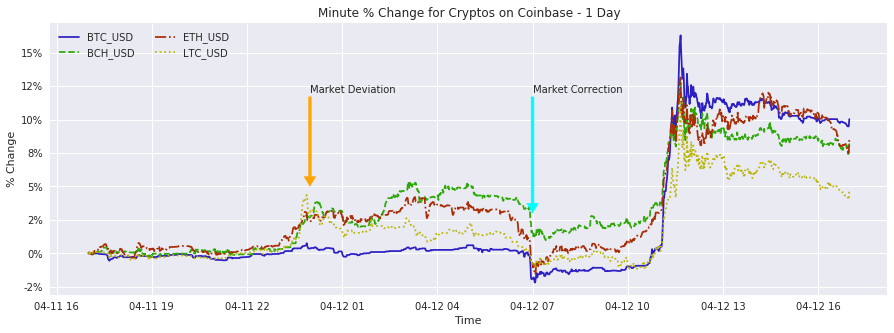

In [51]:
# Question 11 (continued):
# Analyse a random day to look at more granular data
# Look 12 more hours into the future
figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

axes.plot(zoomed_pct_change['BTC_USD'], color='#2C1FC4', linestyle='solid')
axes.plot(zoomed_pct_change['BCH_USD'], color='#2CA907', linestyle='dashed')
axes.plot(zoomed_pct_change['ETH_USD'], color='#A92E07', linestyle='dashdot')
axes.plot(zoomed_pct_change['LTC_USD'], color='#BAB504', linestyle='dotted')

axes.set_xlabel('Time')
axes.set_ylabel('% Change')
vals = axes.get_yticks()
axes.set_yticklabels(['{:,.0f}%'.format(x) for x in vals])

axes.set_title('Minute % Change for Cryptos on Coinbase - 1 Day')
axes.legend(ncol=2, loc='upper left')

date_num = datetime.datetime.strptime('2018-04-12 07:00:00', '%Y-%m-%d %H:%M:%S')
date_num = matplotlib.dates.date2num(date_num)

date_num2 = datetime.datetime.strptime('2018-04-12 07:00:00', '%Y-%m-%d %H:%M:%S')
date_num2 = matplotlib.dates.date2num(date_num2)

date_num3 = datetime.datetime.strptime('2018-04-11 23:59:00', '%Y-%m-%d %H:%M:%S')
date_num3 = matplotlib.dates.date2num(date_num3)

date_num4 = datetime.datetime.strptime('2018-04-11 23:59:00', '%Y-%m-%d %H:%M:%S')
date_num4 = matplotlib.dates.date2num(date_num4)

axes.annotate(
    'Market Correction', 
    xy=(date_num, 3), 
    xytext=(date_num2, 12),
    arrowprops=dict(  
        width=3,
        headwidth=12,
        headlength=10, 
        color='cyan'
    )  
)

axes.annotate(
    'Market Deviation', 
    xy=(date_num3, 5), 
    xytext=(date_num4, 12),
    arrowprops=dict(  
        width=3,
        headwidth=12,
        headlength=10, 
        color='orange'
    )  
)

print('Correlations on Daily Basis:')
print(zoomed_pct_change.corr())

The above graph is the same as its predecesor, shifted 12 hours into the future. The orange arrow shows the original deviation mentioned in the previous graph. Not long after this deviation, the prices reverted to become much more in line with Bitcoin (denoted by the cyan arrow). 
This suggests 2 possibilities:
    1. Cryptos are so connected that they will eventualte correct themselves in the case of a deviation
    2. Bitcoin controls the market - meaning that other cryptos react to Bitcoin's movements rather than vise versa

While these possiblities are lossley based on a small sample size, there does seem to be some truth to them when looking at the recent history of crypto. If they hold water it might be possible to predict the direction of prices when deviations occur

Text(0.5,0,'Date')

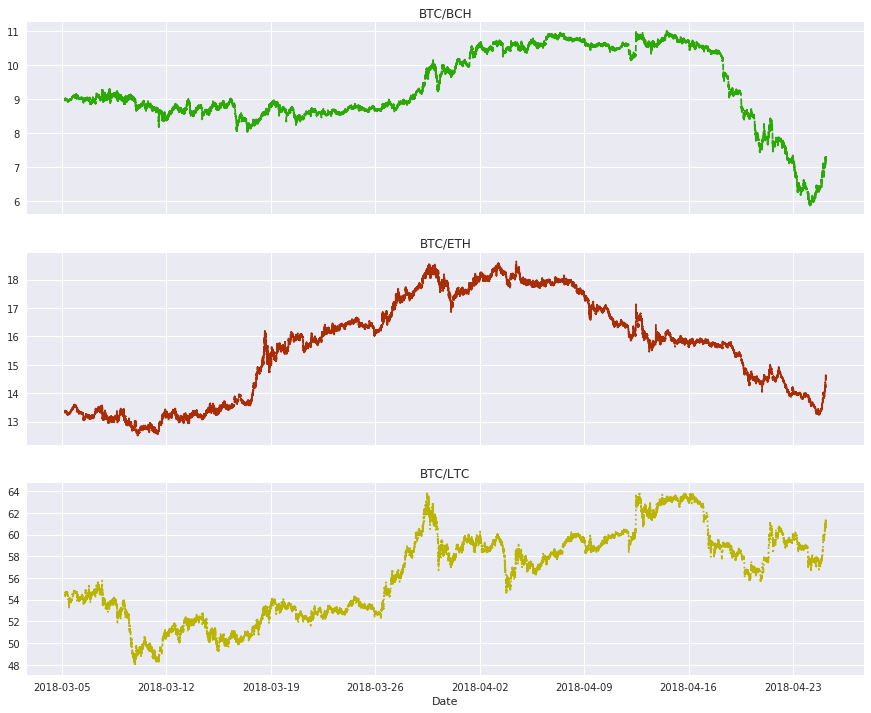

In [52]:
# Question 12:
# Compare changing prices of BTC directly to each crypto

btc_to_bch = minute_data['BTC_USD'] / minute_data['BCH_USD']
btc_to_eth = minute_data['BTC_USD'] / minute_data['ETH_USD']
btc_to_ltc = minute_data['BTC_USD'] / minute_data['LTC_USD']

figure, axes = plt.subplots(3, sharex=True)
figure.set_size_inches(15, 12)
axes[0].plot(btc_to_bch, color='#2CA907', linestyle='dashed')
axes[1].plot(btc_to_eth, color='#A92E07', linestyle='dashdot')
axes[2].plot(btc_to_ltc, color='#BAB504', linestyle='dotted')

axes[0].set_title('BTC/BCH')
axes[1].set_title('BTC/ETH')
axes[2].set_title('BTC/LTC')
axes[2].set_xlabel('Date')

The above graphs show how each crypto compares to btc on a price basis. The more volatile the line, the less related the two are in price change. BCH for example started out very correlated with BTC. For the better part of a month there was little movement. This changed after roughly a month from the beginning of the data however and has been much more volatile.

In [53]:
# Question 13:
# Analyze if price changes between cryptos and BTC revert to a moving average
# Get statistics

zoomed_3day = minute_data.loc['2018-03-05 05:02:00':'2018-03-08 05:02:00'].resample('15min', how='first')
btc_to_bch = zoomed_3day['BTC_USD'] / zoomed_3day['BCH_USD']
btc_to_eth = zoomed_3day['BTC_USD'] / zoomed_3day['ETH_USD']
btc_to_ltc = zoomed_3day['BTC_USD'] / zoomed_3day['LTC_USD']

btc_bch_moving_average = btc_to_bch.rolling(window=20).mean()
btc_bch_moving_std = btc_to_bch.rolling(window=20).std()
btc_bch_bollinger_band_upper = btc_bch_moving_average + 2*btc_bch_moving_std
btc_bch_bollinger_band_lower = btc_bch_moving_average - 2*btc_bch_moving_std

btc_eth_moving_average = btc_to_eth.rolling(window=20).mean()
btc_eth_moving_std = btc_to_eth.rolling(window=20).std()
btc_eth_bollinger_band_upper = btc_eth_moving_average + 2*btc_eth_moving_std
btc_eth_bollinger_band_lower = btc_eth_moving_average - 2*btc_eth_moving_std

btc_ltc_moving_average = btc_to_ltc.rolling(window=20).mean()
btc_ltc_moving_std = btc_to_ltc.rolling(window=20).std()
btc_ltc_bollinger_band_upper = btc_ltc_moving_average + 2*btc_ltc_moving_std
btc_ltc_bollinger_band_lower = btc_ltc_moving_average - 2*btc_ltc_moving_std

/home/ubuntu/.pyenv/versions/3.6.2/envs/systems-and-tech-python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
  """


Text(0.5,0,'Date')

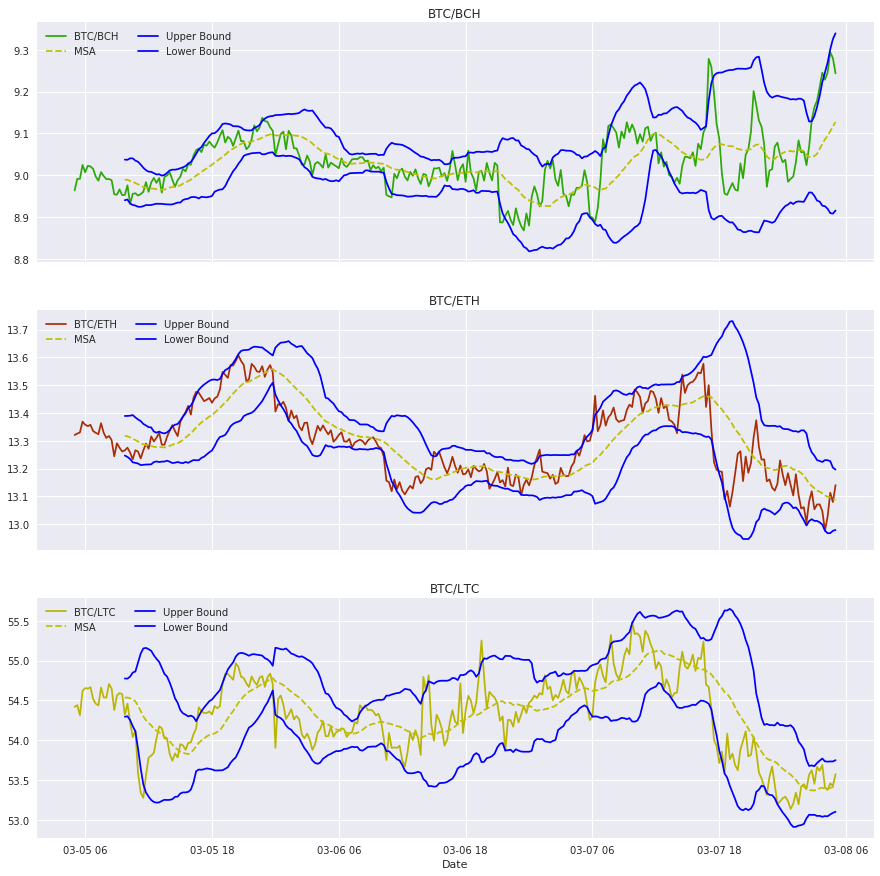

In [54]:
# Question 13 (continued):
# Analyze if price changes between cryptos and BTC revert to a moving average
# Visualize data
figure, axes = plt.subplots(3, sharex=True)
figure.set_size_inches(15, 15)
axes[0].plot(btc_to_bch, color='#2CA907')
axes[0].plot(btc_bch_moving_average, color='y', linestyle='dashed')
axes[0].plot(btc_bch_bollinger_band_upper, color='b')
axes[0].plot(btc_bch_bollinger_band_lower, color='b')
axes[0].legend(['BTC/BCH', 'MSA', 'Upper Bound', 'Lower Bound'], ncol=2, loc='upper left')


axes[1].plot(btc_to_eth, color='#A92E07')
axes[1].plot(btc_eth_moving_average, color='y', linestyle='dashed')
axes[1].plot(btc_eth_bollinger_band_upper, color='b')
axes[1].plot(btc_eth_bollinger_band_lower, color='b')
axes[1].legend(ncol=2, loc='upper left')
axes[1].legend(['BTC/ETH', 'MSA', 'Upper Bound', 'Lower Bound'], ncol=2, loc='upper left')


axes[2].plot(btc_to_ltc, color='#BAB504')
axes[2].plot(btc_ltc_moving_average, color='y', linestyle='dashed')
axes[2].plot(btc_ltc_bollinger_band_upper, color='b')
axes[2].plot(btc_ltc_bollinger_band_lower, color='b')
axes[2].legend(ncol=2, loc='upper left')
axes[2].legend(['BTC/LTC', 'MSA', 'Upper Bound', 'Lower Bound'], ncol=2, loc='upper left')


axes[0].set_title('BTC/BCH')
axes[1].set_title('BTC/ETH')
axes[2].set_title('BTC/LTC')
axes[2].set_xlabel('Date')

The above graphs depict the BTC to each currency, the simple moving average of each pair, and the upper and lower bollinger bands for each pair (sma +- 2 standard deviations). 

Based off these graphs it appears that while the price ratio between BTC and each crypto does often hover around the SMA, the price ratio crosses the upper and lower bollinger bands quite often. This is often as a result of large swings that dramatically adjust the SMA. Due to this it is difficult to predict price reversions based solely off of simple statistics. If short term price volatility can be predicted using statistics, it would require much more testing and more complex analysis.

Note: For visual ease the graphs depict a 3 day sample resampled for 15 minute data

In [77]:
# Question 14:
# Analyze percent changes at certain times of the day

new_pct_change = minute_data.pct_change()
new_pct_change['HOUR'] = new_pct_change.index.hour
hour_group = new_pct_change.groupby('HOUR')

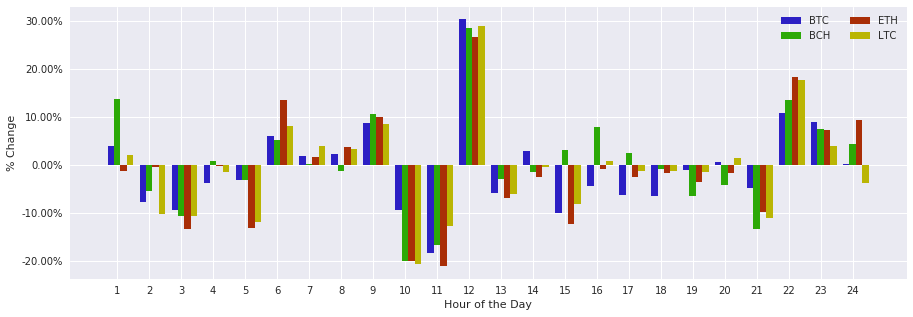

In [78]:
figure, axes = plt.subplots()
figure.set_size_inches(15, 5)

ind = np.arange(1, 25)
axes.bar(ind-.2, hour_group['BTC_USD'].sum(), color='#2C1FC4', width=.2)
axes.bar(ind, hour_group['BCH_USD'].sum(), color='#2CA907', width=.2)
axes.bar(ind+.2, hour_group['ETH_USD'].sum(), color='#A92E07', width=.2)
axes.bar(ind+.4, hour_group['LTC_USD'].sum(), color='#BAB504', width=.2)
axes.set_xlabel('Hour of the Day')
axes.set_xticks((ind + .2 / 2)-.1)
axes.set_ylabel('% Change')
vals = axes.get_yticks()
axes.set_yticklabels(['{:,.2f}%'.format(x*100) for x in vals])
axes.legend(['BTC', 'BCH', 'ETH', 'LTC'], ncol=2, loc='upper right')

The above graph depicts the sum of percent changes within each hour of the day. Surprisingly there seems to be consistent hours that find big declines or jumps in price. The twelfth hour of the day for example sees a significantly higher jump in prices than any other hour, while hours 10-11 see large declines in prices.

Note: Time is in UTC 